## Topic Modelling

In [ ]:
import os
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import pandas as pd
import pickle
from gensim import corpora, models, similarities

In [ ]:
#read file into dataframe
documents = pd.read_csv("abcnews-date-text.csv")
documents.head()

In [20]:
print (len(documents['headline_text']))

1103665


In [7]:
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords, stem_text

data_text = documents[['headline_text']]
data_text = data_text.astype('str')
data_text['preprocessed'] =data_text.applymap(preprocess_string)

# data_text['no_stop_words'] =data_text['headline_text'].apply(remove_stopwords)
# data_text['stemmed_topic'] = data_text['no_stop_words'].apply(stem_text)
# data_text['tokenized_topic'] = [[word for word in document.split()]for document in data_text['stemmed_topic']]

pickle.dump(data_text, open('data_text.dat', 'wb'))
data_text.head()

,headline_text,preprocessed
0,aba decides against community broadcasting lic...,"[aba, decid, commun, broadcast, licenc]"
1,act fire witnesses must be aware of defamation,"[act, wit, awar, defam]"
2,a g calls for infrastructure protection summit,"[call, infrastructur, protect, summit]"
3,air nz staff in aust strike for pay rise,"[air, staff, aust, strike, pai, rise]"
4,air nz strike to affect australian travellers,"[air, strike, affect, australian, travel]"


In [21]:
#create dictionary from the preprocessed subject lines
data_text = pickle.load( open( "data_text.dat", "rb" ) )
dictionary = corpora.Dictionary(data_text['preprocessed'])
print(dictionary)

Dictionary(64831 unique tokens: ['aba', 'broadcast', 'commun', 'decid', 'licenc']...)


In [8]:
print(dictionary.token2id)

{'aba': 0, 'broadcast': 1, 'commun': 2, 'decid': 3, 'licenc': 4, 'act': 5, 'awar': 6, 'defam': 7, 'wit': 8, 'call': 9, 'infrastructur': 10, 'protect': 11, 'summit': 12, 'air': 13, 'aust': 14, 'pai': 15, 'rise': 16, 'staff': 17, 'strike': 18, 'affect': 19, 'australian': 20, 'travel': 21, 'ambiti': 22, 'jump': 23, 'olsson': 24, 'tripl': 25, 'win': 26, 'antic': 27, 'barca': 28, 'break': 29, 'delight': 30, 'record': 31, 'aussi': 32, 'match': 33, 'memphi': 34, 'qualifi': 35, 'stosur': 36, 'wast': 37, 'address': 38, 'council': 39, 'iraq': 40, 'secur': 41, 'australia': 42, 'lock': 43, 'opp': 44, 'timet': 45, 'war': 46, 'aid': 47, 'contribut': 48, 'million': 49, 'birthdai': 50, 'celebr': 51, 'robson': 52, 'ahead': 53, 'bathhous': 54, 'plan': 55, 'big': 56, 'championship': 57, 'cycl': 58, 'hope': 59, 'launceston': 60, 'boost': 61, 'paroo': 62, 'suppli': 63, 'water': 64, 'bill': 65, 'blizzard': 66, 'buri': 67, 'state': 68, 'unit': 69, 'brigadi': 70, 'dismiss': 71, 'harass': 72, 'report': 73, 'tr

In [11]:
# # new_doc = "Human computer interaction"
# new_doc = "My mother likes to feed sugar to my sister"
# new_vec = dictionary.doc2bow(new_doc.lower().split())
# print(new_vec)  # the word "interaction" does not appear in the dictionary and is ignored

In [22]:
#convert corpus to a bag of words
corpus = [dictionary.doc2bow(document) for document in data_text['preprocessed']]
print("Example email corpora: {}".format(data_text['preprocessed'][2]))
print("Standard email corpora: {}".format(corpus[2]))

tfidf = models.TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

print("tfidf weighted email corpora: {}".format(tfidf_corpus[2]))

Example email corpora: ['call', 'infrastructur', 'protect', 'summit']


KeyboardInterrupt: 

In [10]:
#  lda = models.LdaModel(tfidf, id2word = dictionary, num_topics=5)
lda = models.LdaModel(tfidf_corpus, id2word = dictionary, num_topics=5)

In [105]:
print(lda)

LdaModel(num_terms=64831, num_topics=5, decay=0.5, chunksize=2000)


In [106]:
doc = "A man was killed just because he protested against Donald Trump"
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lda = lda[vec_bow] # convert the query to LDA space
print(vec_lda)

[(0, 0.042036343), (1, 0.27441448), (2, 0.40025502), (3, 0.04000004), (4, 0.24329412)]


In [107]:
index = similarities.MatrixSimilarity(lda[corpus]) # transform corpus to LSI space and index it

2018-04-01 13:01:58,486 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2018-04-01 13:10:03,857 : INFO : creating matrix with 1103665 documents and 5 features


In [108]:
 sims = index[vec_lda] # perform a similarity query against the corpus

In [109]:
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print(sims)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [110]:
lda.show_topics()

[(0,
  '0.009*"man" + 0.007*"polic" + 0.006*"tasmania" + 0.005*"perth" + 0.005*"charg" + 0.005*"woman" + 0.005*"car" + 0.004*"sydnei" + 0.004*"canberra" + 0.004*"royal"'),
 (1,
  '0.009*"donald" + 0.006*"market" + 0.005*"victoria" + 0.005*"australian" + 0.004*"share" + 0.004*"energi" + 0.004*"rate" + 0.004*"busi" + 0.004*"countri" + 0.004*"new"'),
 (2,
  '0.019*"trump" + 0.011*"govern" + 0.006*"peopl" + 0.005*"leagu" + 0.005*"street" + 0.005*"malcolm" + 0.004*"famili" + 0.004*"victorian" + 0.004*"sentenc" + 0.004*"nrl"'),
 (3,
  '0.007*"turnbul" + 0.007*"elect" + 0.007*"live" + 0.007*"australia" + 0.006*"new" + 0.006*"state" + 0.006*"adelaid" + 0.005*"polit" + 0.005*"korea" + 0.004*"north"'),
 (4,
  '0.011*"queensland" + 0.008*"sex" + 0.006*"drum" + 0.006*"australia" + 0.006*"marriag" + 0.005*"world" + 0.005*"afl" + 0.005*"final" + 0.005*"citi" + 0.005*"win"')]

In [111]:
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)

In [17]:
pyLDAvis.display(vis)

In [112]:
os.getcwd()

'C:\\Users\\MAHE'

In [3]:
# project to 2 dimensions for visualization
import gensim
lsi = gensim.models.LsiModel(tfidf_corpus, id2word=dictionary, num_topics=2)

# write out coordinates to file
fcoords = open(os.path.join('C:\\Users\\MAHE', "coords.csv"), 'w')
for vector in lsi[corpus]:
    if len(vector) != 2:
        continue
    fcoords.write("%6.4f\t%6.4f\n" % (vector[0][1], vector[1][1]))
fcoords.close()

NameError: name 'tfidf_corpus' is not defined

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# MODELS_DIR = "/path/to/models/dir"
MODELS_DIR = "C:\\Users\\MAHE"
MAX_K = 9

X = np.loadtxt(os.path.join(MODELS_DIR, "coords.csv"), delimiter="\t")
ks = range(1, MAX_K + 1)

inertias = np.zeros(MAX_K)
diff = np.zeros(MAX_K)
diff2 = np.zeros(MAX_K)
diff3 = np.zeros(MAX_K)
for k in ks:
    kmeans = KMeans(k).fit(X)
    inertias[k - 1] = kmeans.inertia_
    # first difference    
    if k > 1:
        diff[k - 1] = inertias[k - 1] - inertias[k - 2]
    # second difference
    if k > 2:
        diff2[k - 1] = diff[k - 1] - diff[k - 2]
    # third difference
    if k > 3:
        diff3[k - 1] = diff2[k - 1] - diff2[k - 2]

elbow = np.argmin(diff3[3:]) + 3

plt.plot(ks, inertias, "b*-")
plt.plot(ks[elbow], inertias[elbow], marker='o', markersize=12,
         markeredgewidth=2, markeredgecolor='r', markerfacecolor=None)
plt.ylabel("WSS")
plt.xlabel("K")
plt.show()

KeyboardInterrupt: 

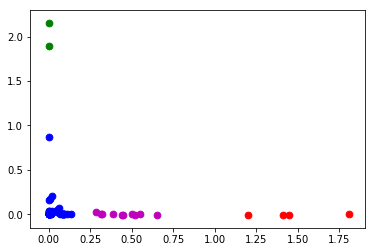

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

MODELS_DIR = "C:\\Users\\MAHE"
NUM_TOPICS = 4

X = np.loadtxt(os.path.join(MODELS_DIR, "coords.csv"), delimiter="\t")
kmeans = KMeans(NUM_TOPICS).fit(X)
y = kmeans.labels_

colors = ["b", "g", "r", "m", "c", "y"]
for i in range(X.shape[0]):
    plt.scatter(X[i][0], X[i][1], c=colors[y[i]], s=45)    
plt.show()

## Let's try NMF now

In [70]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;

In [94]:
vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(data_text['stemmed_topic'][0:100]);
tf_feature_names = vectorizer.get_feature_names()

In [91]:
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

In [73]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [84]:
nmf = NMF(n_components=5, init='nndsvd');

In [85]:
nmf.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0,
  max_iter=200, n_components=5, random_state=None, shuffle=False,
  solver='cd', tol=0.0001, verbose=0)

In [86]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(5):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);


# In[139]:

get_nmf_topics(nmf, 20)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,fund,head,korean,ahead,break
1,cemeteri,highwai,subwai,bathhous,rare
2,cadel,crash,death,plan,harrington
3,upgrad,injur,toll,ethanol,record
4,miss,girl,miss,fuel,barca
5,alloc,pull,man,blend,antic
6,youth,rio,314,kelli,delight
7,risk,bueno,underwai,big,thriller
8,help,open,investig,opp,philippoussi
9,restor,air,continu,water,down


## LDA from SK Learn

In [87]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

n_topics = 5 # number of topics
n_iter = 500 # number of iterations

# vectorizer: ignore English stopwords & words that occur less than 5 times

# vectorizer = CountVectorizer(analyzer='word', max_features=5000);
# x_counts = vectorizer.fit_transform(data_text['stemmed_topic']);

# transformer = TfidfTransformer(smooth_idf=False);
# x_tfidf = transformer.fit_transform(x_counts);
# xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

# train an LDA model
lda_model = LatentDirichletAllocation(n_topics=n_topics)
X_topics = lda_model.fit_transform(xtfidf_norm)

C:\Users\MAHE\Anaconda2\envs\py36\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\MAHE\Anaconda2\envs\py36\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [97]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
# display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
big help fund commun lead cossack gilchrist jail restor rest
Topic 1:
ethanol ahead summit fund barca cemeteri bathhous govt miss record
Topic 2:
murder council injur meet crash highwai head secur cadel upgrad
Topic 3:
subwai knock air korean iraq pai griffith firefight came bushfir
Topic 4:
death rare harrington organ risk youth lift manag vote decis


## Let's try T-sne

In [57]:
from sklearn.manifold import TSNE

# a t-SNE model
# angle value close to 1 means sacrificing accuracy for speed
# pca initializtion usually leads to better results 
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')

# 20-D -> 2-D
tsne_lda = tsne_model.fit_transform(X_topics)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.361658
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.965687
[t-SNE] Error after 1000 iterations: 0.012601


### and while we are at it, let's try K-Means as well

In [60]:
# Compute the clusters
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(tsne_lda)
kmeans.cluster_centers_.shape

(5, 2)

In [69]:
import sklearn
sklearn.__version__

'0.19.1'